#**Home Assignment 13**
Aleksandr Zybin \\
Sysoev Anatoly


##Exercise 13.1 
Consider a Gaussian mixture model where the covariance matrices are assumed to be scalar: $\mathbf{\Sigma}_{r}=\sigma \mathbf{I}$ $ \forall r=1, \ldots, R$, and $\sigma$ is a fixed parameter. Discuss the analogy between the $K$ -means clustering algorithm and the EM algorithm for fitting this mixture model in detail. Show that in the limit $\sigma \rightarrow 0$ the two methods coincide.

### General form of Gaussian Mixture Model

Here we consider a Gaussian mixture model of the form of a radial basis expansion (i.e. $\sum_{r}=\sigma I$ $\forall r=1,...,R$):
>$f(x)=∑_{r=1}^{R}φ(x;\mu_{r},Σ_{r})$,

where the density function is: 
>$P(X|G=k)=\sum_{r=1}^{R_{k}}\pi_{kr}φ(X;\mu_{kr},Σ)$

### K-Means model 
*(Algorithm 14.1, p.510; 13.2.1 K-means Clustering, p.460)*

Firstly, let's consider the K-means clustering algorithm. The general idea of K-Means algorithm is to choose the desired number of cluster centers, then the K-means procedure iteratively moves the centers to minimize the total within cluster variance. We can split up this algorithm into two steps:


* For each center the subset of training points (its cluster) is identified that is closer to it than any other center. The distance for each point is calculated: 
> $d\left(x_{i}, x_{i^{\prime}}\right)=\sum_{j=1}^{p}\left(x_{i j}-x_{i^{\prime} j}\right)^{2}=\left\|x_{i}-x_{i^{\prime}}\right\|^{2}$

* The means of each feature for the data points in each cluster are computed, and this mean vector becomes the new center for that cluster.

These steps are iterated until convergence.

In general, if we talk in the terminology of EM algorithm, K-means has a responsibility function which assigns points based on their distances with zero variance (assignment is deterministic or 'hard').


### EM algorithm 
*(Algorithm 8.1, p.275; 13.2.3 Gaussian Mixtures, p.463)*

The EM algorithm for Gaussian mixtures is similar to K-means, however, assignment of each point to the cluster is 'softer' since it is based on probabilistic distribution of points among clusters. EM algorithm takes into account the notion of spread within each clusters (i.e. $\sigma>0$).

Each cluster is described in terms of a Gaussian density, which has a centroid (as in K-means), and a covariance matrix. The two steps of the alternating EM algorithm are very similar to the two steps in K-means:

• In the E-step, each observation is assigned a responsibility or weight for each cluster, based on the likelihood of each of the corresponding Gaussians. Observations close to the center of a cluster (like in K-means) will most likely get weight 1 for that cluster, and weight 0 for every other cluster. Observations half-way between two clusters divide their weight accordingly. The responsibility function is calculated as:


> $γi=\frac{\hat{\pi}\phi_{\hat{\theta}_{2}}(y_{i})}{(1−\hat{π})\phi_{\hat{\theta}_{1}}(y_{i})+\hat{π}\phi_{\hat{\theta}_{2}}}(y_{i}),i=1,2,...,N.$



• In the M-step, each observation contributes to the weighted means (and covariances) for every cluster:
> $\hat{\mu}_{1}=\frac{\sum_{i=1}^{N}\left(1-\hat{\gamma}_{i}\right) y_{i}}{\sum_{i=1}^{N}\left(1-\hat{\gamma}_{i}\right)}, \quad \hat{\sigma}_{1}^{2}=\frac{\sum_{i=1}^{N}\left(1-\hat{\gamma}_{i}\right)\left(y_{i}-\hat{\mu}_{1}\right)^{2}}{\sum_{i=1}^{N}\left(1-\hat{\gamma}_{i}\right)}$
>
>$\hat{\mu}_{2}=\frac{\sum_{i=1}^{N} \hat{\gamma}_{i} y_{i}}{\sum_{i=1}^{N} \hat{\gamma}_{i}}, \quad \hat{\sigma}_{2}^{2}=\frac{\sum_{i=1}^{N} \hat{\gamma}_{i}\left(y_{i}-\hat{\mu}_{2}\right)^{2}}{\sum_{i=1}^{N} \hat{\gamma}_{i}}$
>
>$\text { and the mixing probability } \hat{\pi}=\sum_{i=1}^{N} \hat{\gamma}_{i} / N \text { . }$

These steps are iterated until convergence.



Overall, the analogy between two methods is that:


1.   Both methods need starting parameters (number of clusters for K-means, and distribution parameters $\hat{\mu}_{1}, \hat{\sigma}_{1}^{2}, \hat{\mu}_{2}, \hat{\sigma}_{2}^{2}, \hat{\pi}$  for EM method;
2.   Both methods include two similar steps:
  *   Estimation of distance/responsibility
  *   Reevaluation of the model based on the computed parameters
3. Iterative nature of the methods.

in the limit $\sigma\rightarrow0$ EM algorithm determines points to each cluster on the binary basis like K-means, there is no spread within each cluster. In other words, each point falls into a cluster with probability 0 or 1. Thus, in this sense these two methods coincide. 

##Exercise 13.7

In [ ]:
# install.packages("data.table")
library(data.table)
library(ggplot2)
library(class)

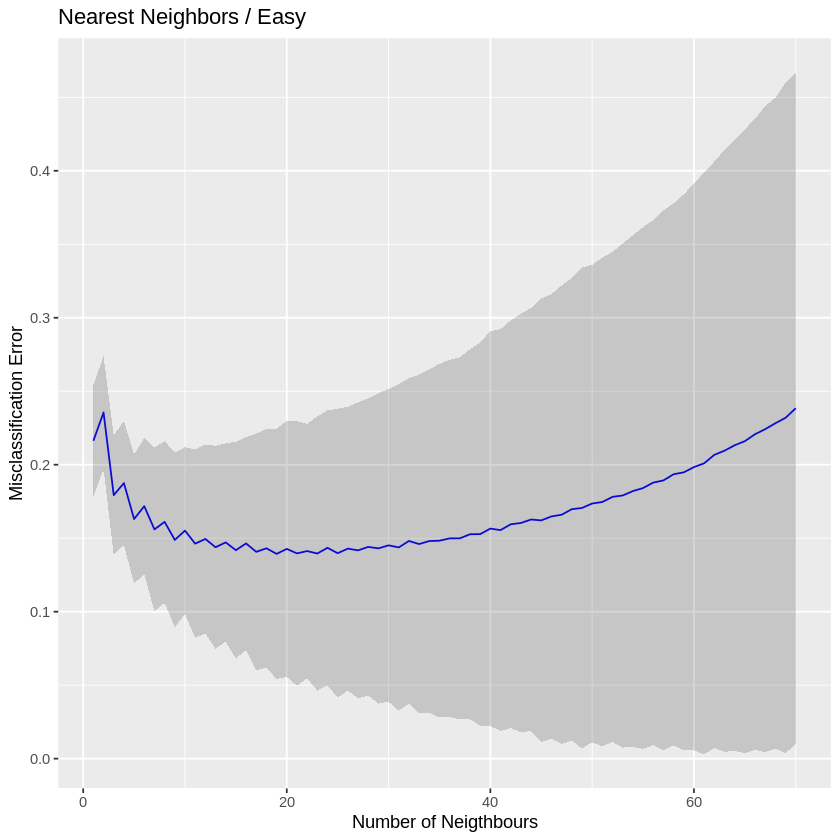

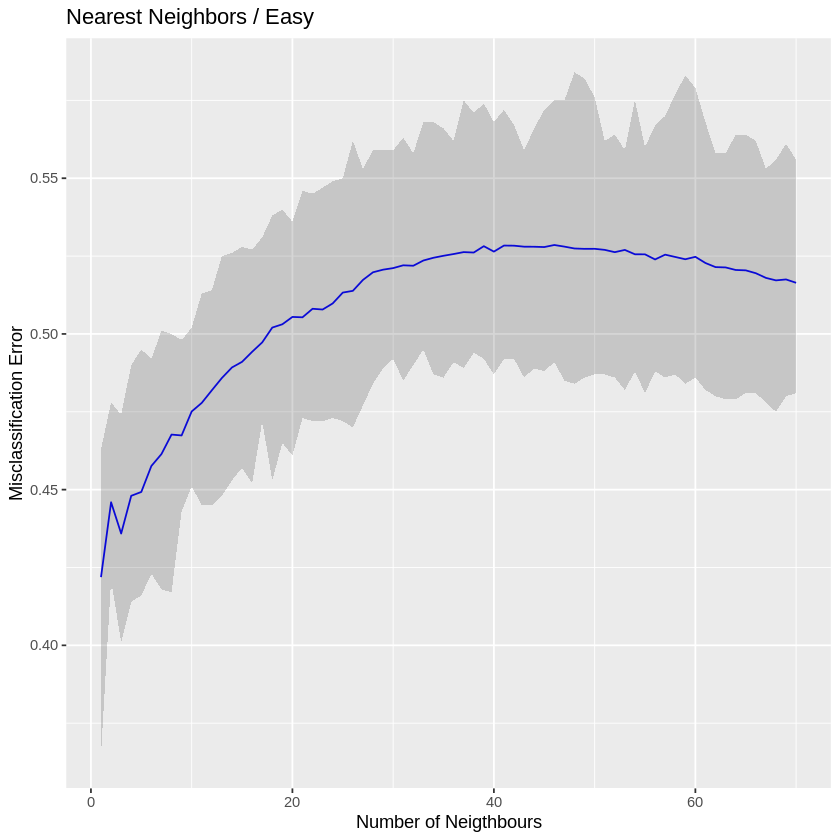

In [ ]:
the_func = function(s = 0) {    
    # preparing data
    N = 1100
    X = list()
    for (i in 1:10) {
        set.seed(s + i)
        X[[i]] = runif(N, 0, 1)
    }

    y_easy = 1 * (X[[1]] > 0.5)

    temp = rep(1, N)
    for (i in 1:3) {
        temp = temp * (X[[i]] - 0.5)
    }
    y_diff = 1 * (sign(temp) > 0)

    # transform X into a dataframe
    X = data.frame(matrix(unlist(X), nrow=length(X[[1]]), byrow=F), stringsAsFactors=F)

    #train/test split
    x_train = X[1:100, ]
    x_test = X[101:1100, ]

    y_easy_train = y_easy[1:100]
    y_easy_test = y_easy[101:1100]

    y_diff_train = y_diff[1:100]
    y_diff_test = y_diff[101:1100]


    # KNN
    easy_err = c()
    diff_err = c()
    for (k in 1:70) {
        y_easy_pred = knn(x_train, x_test, cl = y_easy_train, k = k)
        err = sum(y_easy_test != y_easy_pred) / 1000
        easy_err = c(easy_err, err)

        y_diff_pred = knn(x_train, x_test, cl = y_diff_train, k = k)
        err = sum(y_diff_test != y_diff_pred) / 1000
        diff_err = c(diff_err, err)
    }

    return (list(easy_err, diff_err))
}

colMax = function(data) sapply(data, max, na.rm = T)
colMin = function(data) sapply(data, min, na.rm = T)
colVar = function(data) sapply(data, var, na.rm = T)

# repeate the experiment 10 times
res_easy = list()
res_diff = list()
for (s in 1:50) {
    temp = the_func(s)
    res_easy[[s]] = temp[[1]]
    res_diff[[s]] = temp[[2]]
}

# convert results into 10x70 dataframes
res_easy = data.frame(matrix(unlist(res_easy), nrow=length(res_easy), byrow=T), stringsAsFactors=F)
res_diff = data.frame(matrix(unlist(res_diff), nrow=length(res_diff), byrow=T), stringsAsFactors=F)


# # plot 1
df1 = colMeans(res_easy)
df1 = data.frame(1:70, df1)
df1$min = colMin(res_easy)
df1$max = colMax(res_easy)

# confidence interval
df1$low = colMeans(res_easy) - 1.96 * sqrt(colVar(res_easy))
df1$high = colMeans(res_easy) + 1.96 * sqrt(colVar(res_easy))

ggplot(data = df1, aes(x = X1.70, y = df1)) + geom_line(color="blue") +
    geom_ribbon(aes(ymin = low, ymax = high), alpha = 0.2) +   
    xlab("Number of Neigthbours") + ylab("Misclassification Error") +
    ggtitle("Nearest Neighbors / Easy")


# # plot 2
df1 = colMeans(res_diff)
df1 = data.frame(1:70, df1)
df1$min = colMin(res_diff)
df1$max = colMax(res_diff)

# confidence interval
df1$low = colMeans(res_diff) - 1.96 * sqrt(colVar(res_diff))
df1$high = colMeans(res_diff) + 1.96 * sqrt(colVar(res_diff))

ggplot(data = df1, aes(x = X1.70, y = df1)) + geom_line(color="blue") +
    geom_ribbon(aes(ymin = min, ymax = max), alpha = 0.2) +
    xlab("Number of Neigthbours") + ylab("Misclassification Error") +
    ggtitle("Nearest Neighbors / Easy")

## b)

In [ ]:
N = 1100
X = list()
for (i in 1:10) {
    set.seed(s + i)
    X[[i]] = runif(N, 0, 1)
}

y_easy = 1 * (X[[1]] > 0.5)

temp = rep(1, N)
for (i in 1:3) {
    temp = temp * (X[[i]] - 0.5)
}
y_diff = 1 * (sign(temp) > 0)

# transform all into a dataframe
X = data.frame(matrix(unlist(X), nrow=length(X[[1]]), byrow=F), stringsAsFactors=F)

df_easy = data.frame(X, as.factor(y_easy))
df_diff = data.frame(X, as.factor(y_diff))

In [ ]:
# install.packages("e1071")
library(caret)

trControl = trainControl(method = "cv", number = 5)

fit_easy = train(as.factor.y_easy. ~ .,
            method     = "knn",
            tuneGrid   = expand.grid(k = 1:70),
            trControl  = trControl,
            metric     = "Accuracy",
            data       = df_easy)

fit_diff = train(as.factor.y_diff. ~ .,
            method     = "knn",
            tuneGrid   = expand.grid(k = 1:70),
            trControl  = trControl,
            metric     = "Accuracy",
            data       = df_diff)

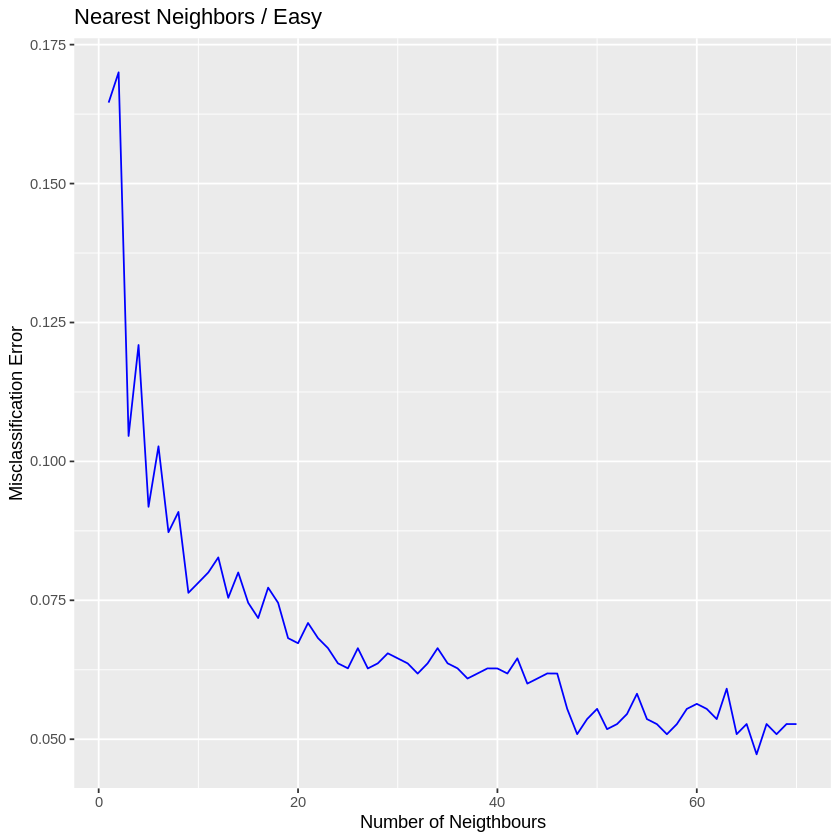

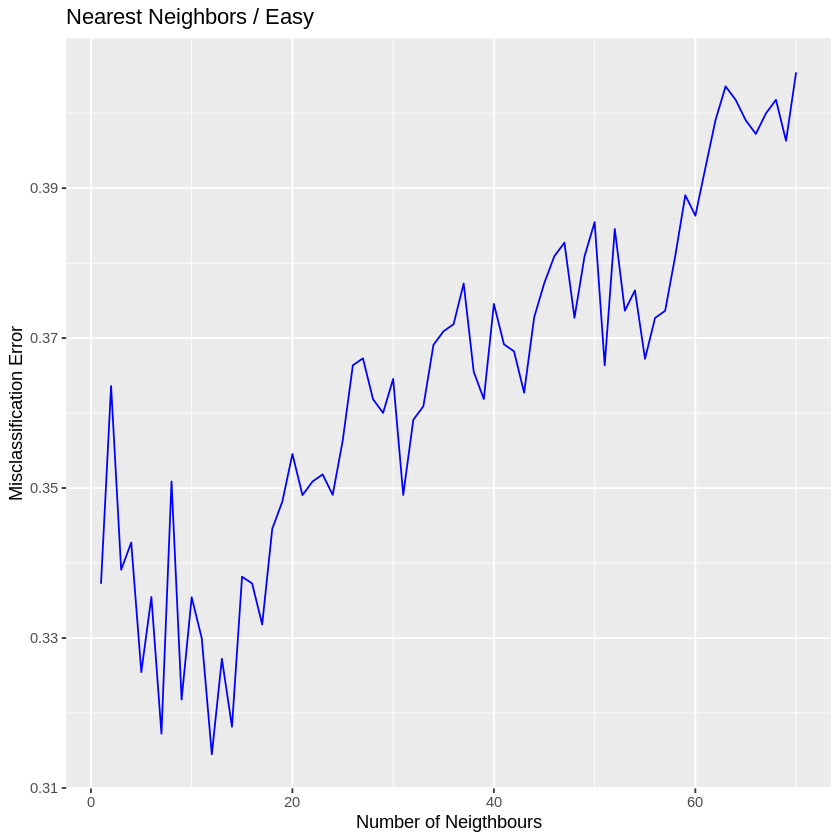

In [ ]:
df1 = data.frame(1:70, 1 - fit_easy[[4]]$Accuracy)
colnames(df1) = c("x", "acc")
ggplot(data = df1, aes(x = x, y = acc)) + geom_line(color="blue") +
    xlab("Number of Neigthbours") + ylab("Misclassification Error") +
    ggtitle("Nearest Neighbors / Easy")

df1 = data.frame(1:70, 1 - fit_diff[[4]]$Accuracy)
colnames(df1) = c("x", "acc")
ggplot(data = df1, aes(x = x, y = acc)) + geom_line(color="blue") +
    xlab("Number of Neigthbours") + ylab("Misclassification Error") +
    ggtitle("Nearest Neighbors / Easy")

It can be seen, from the collection of graphs above, that there is a **sgnificant difference** between the plots produced in the first part and the ones obtained using 5-fold cv. In the first part we observed a curved shape of the error line as it reached its extremum and than rounded off. In contrast, the error rate shown on the cv graphs reach extremums at their ends - where the number of nearest neighbours is the largest.